 # **Capitulo 1**

# 1. Búsqueda de conectores clave

### Datos: **lista** de `usuarios` de la empresa

In [ ]:
#  variable = Lista => diccionario 
#  variable = [{}] 
#  variable = [ {llave : valor, llave : valor}, {llave : valor, llave : valor},..., {llave : valor, llave : valor} ]
#* usuarios = [ {"id" : "valor_id", "nombre" : "valor_nombre"} ]

usuarios = [
    { "id": 0, "nombre": "Hero" },
    { "id": 1, "nombre": "Dunn" },
    { "id": 2, "nombre": "Sue" },
    { "id": 3, "nombre": "Chi" },
    { "id": 4, "nombre": "Thor" },
    { "id": 5, "nombre": "Clive" },
    { "id": 6, "nombre": "Hicks" },
    { "id": 7, "nombre": "Devin" },
    { "id": 8, "nombre": "Kate" },
    { "id": 9, "nombre": "Klein" }
]

### Datos: **lista** por pares de id\`s que representa las `amistades_pares` 

In [ ]:
# variable = lista => tupla
# variable = [()]
# variable = [ (valor_1, valor_2), (valor_1, valor_2), ..., (valor_1, valor_2) ]
#* amistades_pares = [ (usuario_id, usuario_id) ]

amistades_pares = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

### Ilustracion de la red de amigos de **DataScencecester**

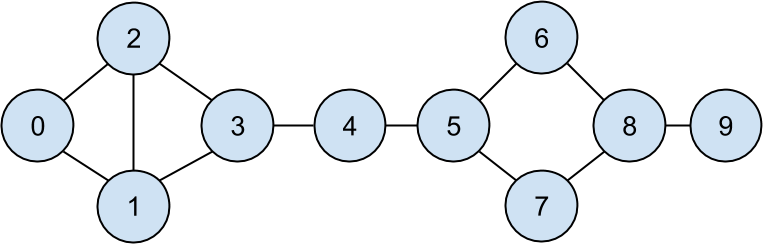

### Una lista de parejas no es la forma mas facil de trabajar

`[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]`

In [ ]:
usuario = 1
print("amistades del usuario " + str(usuario)+": ")

for i, j in amistades_pares:    # obtenemos los id de los usuarios que estan en la amistad par                 
    if usuario in (i, j):       # ¿el usuario está en esa amistad? 
        if i != usuario:        # si el primer id no soy yo mismo
            print(i)                # entonces es mi amigo    
        elif j != usuario:      # si el segundo id no soy yo mismo
            print(j)                # entonces es mi amigo

amistades del usuario 1: 
0
2
3


#### Mejor usemos un `dict`

Buscar las cosas en un `dict` es muy rapido: 
- - - -
**dict**: 
`{llave : valor}`

`{ usuario_id : [amigo_id,...,amigo_id] }`

In [ ]:
# Inicializamos el diccionario con una lista vacía para cada ID de usuario:
# amistades = { 1 : [],..., usuario_id : [] }

amistades = {usuario["id"]: [] for usuario in usuarios}

`amistades = {usuario["id"]: [] for usuario in usuarios}` equivale a:
- - - -
~~~
amistades = {}
for usuario in usuarios:
    amistades[usuario['id']] = []
~~~

In [ ]:
amistades = {}
for usuario in usuarios:
    amistades[usuario['id']] = [5]

In [ ]:
# Ahora recorremos las parejas de amistad para llenar cada usuario con su amigo:

for i, j in amistades_pares:
    amistades[i].append(j)  # añadismos j como amigo del usuario i
    amistades[j].append(i)  # añadismos i como amigo del usuario j

In [ ]:
amistades

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

#### Comparacion entre una lista de parejas y un `dict`

~~~
amistades_pares =[ (0, 1), (0, 2), ..., (7, 8), (8, 9) ]

amistades = { 0: [1, 2], 1: [0, 2, 3],..., 8: [6, 7, 9], 9: [8] }
~~~

In [ ]:
usuario = 1
print("amistades del usuario "+str(usuario)+": ")

for i, j in amistades_pares:    # obtenemos los id de los usuarios que estan en la amistad par                 
    if usuario in (i, j):       # ¿el usuario está en esa amistad? 
        if i != usuario:        # si el primer id no soy yo mismo
            print(i)                # entonces es mi amigo    
        elif j != usuario:      # si el segundo id no soy yo mismo
            print(j)                # entonces es mi amigo

amistades del usuario 1: 
0
2
3


In [ ]:
amistades[1]

[0, 2, 3]

### ¿Cual es el número promedio de conexiones?

In [ ]:
# 1ro - Hallamos el numero total de conexiones

def numero_de_amigos(usuario):              
  """¿Cuantos amigos tiene _usuario_ ? """
  usuario_id = usuario["id"]                    # usuario_id = {"id" : 0, "nombre" : "Hero"}
  amigos_id = amistades[usuario_id]             #* amigos_id = amistades[0] ➡ amigos_id = [1, 2]
  return len(amigos_id)                         # 2

In [ ]:
print(numero_de_amigos(usuarios[0]))
print(numero_de_amigos(usuarios[1]))
print(numero_de_amigos(usuarios[2]))
print(numero_de_amigos(usuarios[3]))
print(numero_de_amigos(usuarios[4]))
print(numero_de_amigos(usuarios[5]))
print(numero_de_amigos(usuarios[6]))
print(numero_de_amigos(usuarios[7]))
print(numero_de_amigos(usuarios[8]))
print(numero_de_amigos(usuarios[9]))

2
3
3
3
2
3
2
2
3
1


##### `total_conexiones` es igual a la **suma** del numero de amigos de cada usuario

In [ ]:
total_conexiones = sum(numero_de_amigos(usuario) for usuario in usuarios)   #* sum(2+3+3+3+2+3+2+2+3+1)
total_conexiones                                                             

24

#### `promedio_conexion` es igual a la **suma** del numero de amigos de cada usuario **dividido** en el total de usuarios

In [ ]:
numero_usuarios = len(usuarios)                         # 10
promedio_conexion = total_conexiones/numero_usuarios    # 24/10
promedio_conexion

2.4

### ¿Quienes son las personas mas conectadas?

In [ ]:
# Creamos una lista de pares donde tengamos el usuario_id, numero_de_amigos
# num_amigos_por_id = [(usuario_id, numero_de_amigos), ..., (usuario_id, numero_de_amigos)]

num_amigos_por_id = [ (usuario["id"], numero_de_amigos(usuario)) for usuario in usuarios ]
print('numero de amigos por id: ' + str(num_amigos_por_id))

numero de amigos por id: [(0, 2), (1, 3), (2, 3), (3, 3), (4, 2), (5, 3), (6, 2), (7, 2), (8, 3), (9, 1)]


#### Ordenamos la lista de `num_amigos_por_id`

In [ ]:
num_amigos_por_id.sort(key=lambda ids_de_amigos : ids_de_amigos[1], reverse=True)   # ids_de_amigos = (0, 2)
print('numero de amigos ordenados por cantidad de amigos: ')
print(num_amigos_por_id)

numero de amigos ordenados por cantidad de amigos: 
[(8, 3), (5, 3), (3, 3), (2, 3), (1, 3), (7, 2), (6, 2), (4, 2), (0, 2), (9, 1)]


#### Entendiendo la ordenacion

#### Otra manera de hacerlo - 1

In [ ]:
orden = lambda ids_de_amigos: ids_de_amigos[1]              # orden = lambda (0, 1) : 1

num_amigos_por_id.sort(key=orden, reverse=True)             # ids_de_amigos = (0, 2)
print('numero de amigos ordenados por cantidad de amigos: ')
print(num_amigos_por_id)

numero de amigos ordenados por cantidad de amigos: 
[(8, 3), (5, 3), (3, 3), (2, 3), (1, 3), (7, 2), (6, 2), (4, 2), (0, 2), (9, 1)]


#### Otra manera de hacerlo - 2

In [ ]:
def orden(ids_de_amigos):
    return ids_de_amigos[1]

num_amigos_por_id.sort(key=orden, reverse=True)             # ids_de_amigos = (0, 2)
print('numero de amigos ordenados por cantidad de amigos: ')
print(num_amigos_por_id)

numero de amigos ordenados por cantidad de amigos: 
[(8, 3), (5, 3), (3, 3), (2, 3), (1, 3), (7, 2), (6, 2), (4, 2), (0, 2), (9, 1)]


#### Ejemplo 1 para entender `key` con `lambda` en el metodo `sort`

In [ ]:
# estudiantes = [('nombre', 'calificacion', 'edad')]
estudiantes = [
    ('john', 'A', 15),
    ('jane', 'C', 12),
    ('dave', 'B', 10),
]
estudiantes.sort(key=lambda estudiante:estudiante[1])
print(estudiantes)

[('dave', 'B', 10), ('jane', 'C', 12), ('john', 'A', 15)]


#### Ejemplo 2 para entender `key` en el metodo `sort` con funciones

In [ ]:
palabras = [
    'a',
    'abcde',
    'abcdef',
    'ghi',
    'kl'
]
palabras.sort(key= len, reverse=True)
print(palabras)

['abcdef', 'abcde', 'ghi', 'kl', 'a']


### Conclusión

##### degree centrality: grado de centralidad

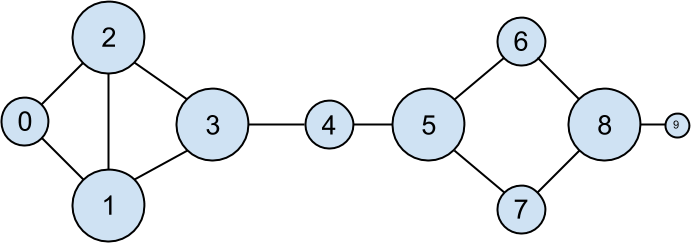